In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from scipy.io import FortranFile
from scipy.interpolate import interp1d
import cutout_utils as cu
from cutout_utils import make_image, read_megatron_cutout
%matplotlib widget

In [2]:
import pandas as pd
import numpy as np
from scipy.io import FortranFile
# from megatron_tools import read_megatron_cutout  # assuming you’ve placed the functions in this file

# 1️⃣ Read the raw Megatron binary
fname = "../../dataset_examples/halo_3517_gas.bin"
ff = FortranFile(fname, 'r')

gas_df = cu.read_megatron_cutout(ff)
ff.close()
positions_max = np.max(gas_df[["x", "y", "z"]].values, axis=0)
positions_min = np.min(gas_df[["x", "y", "z"]].values, axis=0)
positions_center = 0.5 * (positions_max + positions_min)
positions_center_mean = np.mean(gas_df[["x", "y", "z"]].values, axis=0)
radius = 0.5 * np.max(positions_max - positions_min)
print(f"Positions max: {positions_max}")
print(f"Positions min: {positions_min}")
print(f"Positions center: {positions_center}")
print(f"Positions center mean: {positions_center_mean}")
print(f"Radius: {radius}")
print(gas_df.columns)
print(len(gas_df))

Positions max: [0.49848938 0.50099182 0.51243591]
Positions min: [0.49742126 0.49992371 0.51136017]
Positions center: [0.49795532 0.50045776 0.51189804]
Positions center mean: [0.49795388 0.50046688 0.51193306]
Radius: 0.000537872314453125
Index(['redshift', 'dx', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'nH', 'T',
       ...
       'N_dep', 'C_dep', 'Mg_dep', 'Ne_dep', 'Si_dep', 'S_dep', 'Ca_dep',
       'CO_dep', 'H_dep', 'He_dep'],
      dtype='object', length=121)
727761


In [4]:
# a,h = cu.make_image(gas_df[["x","y","z"]],level,gas_df["ne"],gas_df["dx"],view_dir='y',npix=2048,lmin=12,lmax=20,redshift=13.323885,boxsize=50.0)


✅ File loaded.
Columns: Index(['redshift', 'dx', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'nH', 'T'], dtype='object') ...
Number of cells: 727761

--- Data sanity check ---
positions shape: (727761, 3)
level shape: (727761,)
ne shape: (727761,)
dx shape: (727761,)

Dtypes:
 x        float64
y        float64
z        float64
level      int64
ne       float64
dx       float64
dtype: object
Cleaned data: 727761 valid cells remain.
Image width: 26.0417 pkpc


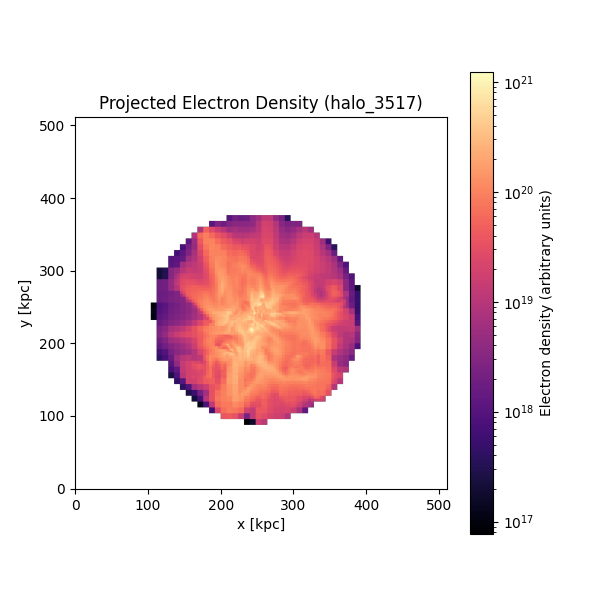

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.io import FortranFile

# --- If the functions are in a file like "megatron_tools.py", import them:
# from megatron_tools import read_megatron_cutout, make_image
# Otherwise, if they’re defined in your notebook already, you can skip the import.

# === 1️⃣ Read the binary file ===
fname = "../../dataset_examples/halo_3517_gas.bin"
ff = FortranFile(fname, 'r')
gas_df = cu.read_megatron_cutout(ff)
ff.close()

print("✅ File loaded.")
print("Columns:", gas_df.columns[:10], "...")  # show first few columns
print("Number of cells:", len(gas_df))

# === 2️⃣ Check shapes and data types ===
print("\n--- Data sanity check ---")
print("positions shape:", gas_df[["x", "y", "z"]].values.shape)
print("level shape:", gas_df["level"].shape)
print("ne shape:", gas_df["ne"].shape)
print("dx shape:", gas_df["dx"].shape)
print("\nDtypes:\n", gas_df[["x","y","z","level","ne","dx"]].dtypes)

# === 3️⃣ Convert all arrays to numeric numpy arrays ===
positions = gas_df[["x","y","z"]].values.astype(float)
levels = gas_df["level"].values.astype(int)
features = gas_df["ne"].values.astype(float)
dx = gas_df["dx"].values.astype(float)

# Optional: drop NaNs if present
mask = np.isfinite(features) & np.isfinite(levels) & np.isfinite(dx)
positions = positions[mask]
levels = levels[mask]
features = features[mask]
dx = dx[mask]


print(f"Cleaned data: {len(features)} valid cells remain.")

# === 4️⃣ Create 2D image ===
image, _ = cu.make_image(
    positions,
    levels,
    features,
    dx,
    view_dir="z",
    npix=512,
    lmin=12,
    lmax=18,
    redshift=0.5,
    boxsize=20.0
)

# === 5️⃣ Plot result ===
plt.figure(figsize=(6,6))
plt.imshow(image, norm=LogNorm(), cmap="magma", origin="lower")
# plt.imshow(image, cmap="magma", origin="lower")
plt.colorbar(label="Electron density (arbitrary units)")
plt.xlabel("x [kpc]")
plt.ylabel("y [kpc]")
plt.title("Projected Electron Density (halo_3517)")
plt.show()
# plt.savefig("projected_electron_density.png", dpi=300)


# Luminocity

Loaded 727761 gas cells.

 Avaraged emissivity: 6.447e-22 erg cm^-3 s^-1 over 727761 valid cells. Max: 1.315e-16 erg cm^-3 s^-1
 Avaraged collisional emissivity: 1.671e-22 erg cm^-3 s^-1 over 727761 valid cells. Max: 3.870e-17 erg cm^-3 s^-1
Total volume in cutout: 4.609e+66 cm^3 = 1.568e+02 kpc^3
The total luminosity from recombination excitation is 2.720e+42 erg/s
The total luminosity from collisional excitation is 1.519e+42 erg/s
The total luminosity is 4.238e+42 erg/s
Image width: 5.5804 pkpc


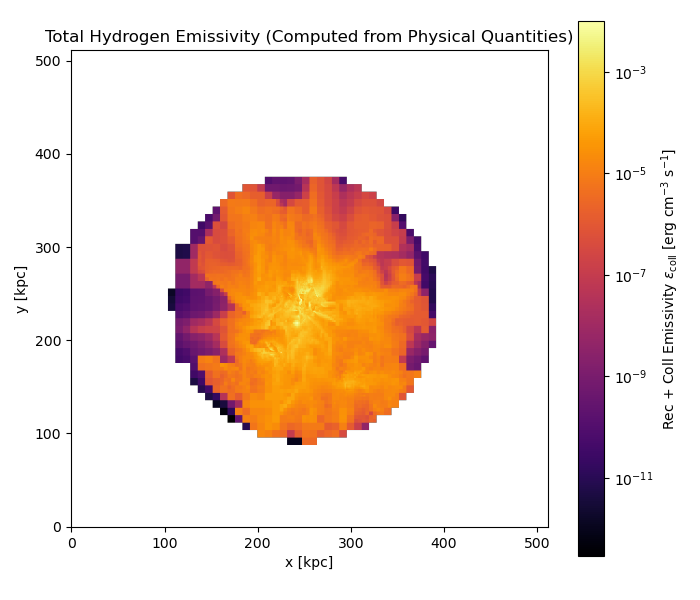

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.io import FortranFile

# --- Step 1: Read Megatron data ---
ff = FortranFile("../DATA/halo_3517_gas.bin", "r")
gas_df = cu.read_megatron_cutout(ff)
ff.close()
print(f"Loaded {len(gas_df)} gas cells.")

# --- Step 2: Compute physical quantities ---
nH   = 10**gas_df["nH"].values          # total hydrogen number density [cm^-3]
T    = 10**gas_df["T"].values           # temperature [K]
ne   = gas_df["ne"].values              # electron density [cm^-3]
xHII = gas_df["H_II"].values            # ionized hydrogen fraction
xHI  = gas_df["H_I"].values             # neutral hydrogen fraction
nHII = nH * xHII                        # ionized hydrogen density [cm^-3]
nHI  = nH * xHI                         # neutral hydrogen density [cm^-3]

# Case B recombination coefficient (Hui & Gnedin 1997)
alphaB = 2.59e-13 * (T / 1e4)**-0.7   # [cm^3 s^-1]

# Lyman-alpha photon energy
E_lya = 10.2 * 1.60218e-12  # erg

# --- Step 3: Compute emissivities ---
# Recombination
emis_rec = ne * nHII * alphaB * E_lya   # [erg cm^-3 s^-1]

# Collisional excitation (Katz+ 2022, Appendix A)
a, b, c, d = 6.58e-18, 4.86e4, 0.185, 0.895
epsilon_coll = a / (T**c) * np.exp(-b / (T**d))
emis_coll = ne * nHI * epsilon_coll     # [erg cm^-3 s^-1]



print(f"\n Avaraged emissivity: {np.mean(emis_rec):.3e} erg cm^-3 s^-1 over {len(emis_rec)} valid cells. Max: {np.max(emis_rec):.3e} erg cm^-3 s^-1")
print(f" Avaraged collisional emissivity: {np.mean(emis_coll):.3e} erg cm^-3 s^-1 over {len(emis_coll)} valid cells. Max: {np.max(emis_coll):.3e} erg cm^-3 s^-1")

# Add to DataFrame for convenience
gas_df["emis_rec_computed"] = emis_rec + emis_coll

# --- Step 4: Prepare for projection ---
positions = gas_df[["x","y","z"]].values.astype(float)
levels = gas_df["level"].values.astype(int)
dx = gas_df["dx"].values.astype(float)
features = gas_df["emis_rec_computed"].values.astype(float)

Vx = (10**dx)**3
print(f"Total volume in cutout: {np.sum(Vx):.3e} cm^3 = {np.sum(Vx)/ (3.086e21)**3:.3e} kpc^3")
print(f"The total luminosity from recombination excitation is {np.sum(emis_rec * Vx):.3e} erg/s")
print(f"The total luminosity from collisional excitation is {np.sum(emis_coll * Vx):.3e} erg/s")
print(f"The total luminosity is {np.sum(features * Vx):.3e} erg/s")


# Clean up bad values
mask = np.isfinite(features) & (features > 0)
positions = positions[mask]
levels = levels[mask]
dx = dx[mask]
features = features[mask]


# --- Step 5: Project to 2D using make_image ---
image, _ = cu.make_image(
    positions,
    levels,
    features,
    dx,
    view_dir="z",      # projection direction
    npix=512,          # image resolution
    lmin=12, lmax=18,  # AMR levels
    redshift=6.0,
    boxsize=20.0
)

# --- Step 6: Plot the emissivity map ---
plt.figure(figsize=(7,6))
plt.imshow(
    image,
    norm=LogNorm(vmax=1e-2),
    cmap="inferno",
    origin="lower",
)

plt.colorbar(label=r"Rec + Coll Emissivity $\epsilon_{\rm coll}$ [erg cm$^{-3}$ s$^{-1}$]")
plt.xlabel("x [kpc]")
plt.ylabel("y [kpc]")
plt.title("Total Hydrogen Emissivity (Computed from Physical Quantities)")
plt.tight_layout()
plt.show()
# plt.savefig("total_emissivity_computed.png", dpi=300)

Loaded 727761 gas cells.
Image width: 5.5804 pkpc


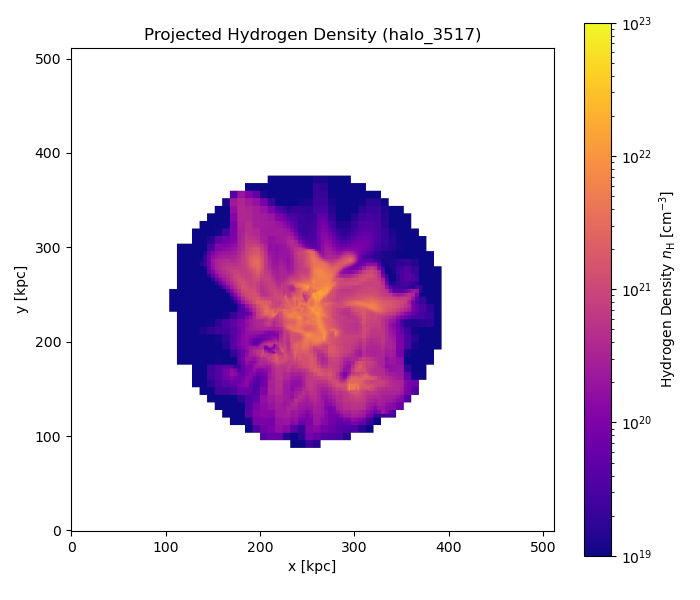

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.io import FortranFile

# --- Step 1: Read the Megatron gas file ---
ff = FortranFile("../DATA/halo_3517_gas.bin", "r")
gas_df = cu.read_megatron_cutout(ff)
ff.close()
print(f"Loaded {len(gas_df)} gas cells.")

# --- Step 2: Compute hydrogen number density ---
features = 10**gas_df["nH"].values.astype(float)

# --- Step 3: Prepare projection inputs ---
positions = gas_df[["x","y","z"]].values.astype(float)
levels = gas_df["level"].values.astype(int)
dx = gas_df["dx"].values.astype(float)

# Clean invalids
mask = np.isfinite(features) & (features > 0)
positions = positions[mask]
levels = levels[mask]
dx = dx[mask]
features = features[mask]

# --- Step 4: Project hydrogen density ---
image, _ = cu.make_image(
    positions,
    levels,
    features,
    dx,
    view_dir="z",      # project along z-axis
    npix=512,
    lmin=12,
    lmax=18,
    redshift=6.0,
    boxsize=20.0
)

# --- Step 5: Plot ---
plt.figure(figsize=(7,6))
plt.imshow(
    image,
    norm=LogNorm(vmin=1e19, vmax=1e23),
    # norm=LogNorm(),
    cmap="plasma",
    origin="lower",
)
plt.colorbar(label=r"Hydrogen Density $n_{\rm H}$ [cm$^{-3}$]")
plt.xlabel("x [kpc]")
plt.ylabel("y [kpc]")
plt.title("Projected Hydrogen Density (halo_3517)")
plt.tight_layout()
plt.show()
# plt.savefig("projected_hydrogen_density.png", dpi=300)


Loaded 727761 gas cells.
Image width: 5.5804 pkpc


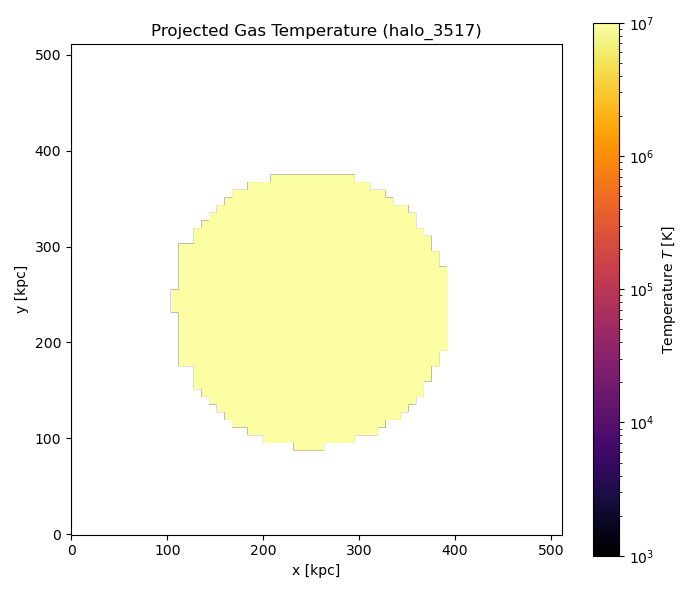

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.io import FortranFile

# --- Step 1: Load the Megatron data ---
ff = FortranFile("../DATA/halo_3517_gas.bin", "r")
gas_df = read_megatron_cutout(ff)
ff.close()
print(f"Loaded {len(gas_df)} gas cells.")

# --- Step 2: Compute temperature in linear units ---
T = 10**gas_df["T"].values   # temperature [K]
features = T.astype(float)

# --- Step 3: Prepare inputs for projection ---
positions = gas_df[["x","y","z"]].values.astype(float)
levels = gas_df["level"].values.astype(int)
dx = gas_df["dx"].values.astype(float)

# Clean invalids (NaN or negative)
mask = np.isfinite(features) & (features > 0)
positions = positions[mask]
levels = levels[mask]
dx = dx[mask]
features = features[mask]

# --- Step 4: Project temperature map ---
image, _ = make_image(
    positions,
    levels,
    features,
    dx,
    view_dir="z",      # project along z-axis
    npix=512,
    lmin=12,
    lmax=18,
    redshift=6.0,
    boxsize=20.0
)

# --- Step 5: Plot the temperature map ---
plt.figure(figsize=(7,6))
plt.imshow(
    image,
    norm=LogNorm(vmin=1e3, vmax=1e7),  # show 10^3–10^7 K
    cmap="inferno",
    origin="lower"
)
plt.colorbar(label=r"Temperature $T$ [K]")
plt.xlabel("x [kpc]")
plt.ylabel("y [kpc]")
plt.title("Projected Gas Temperature (halo_3517)")
plt.tight_layout()
plt.show()
plt.savefig("projected_gas_temperature.png", dpi=300)

Loaded 727761 gas cells.
Image width: 5.5804 pkpc


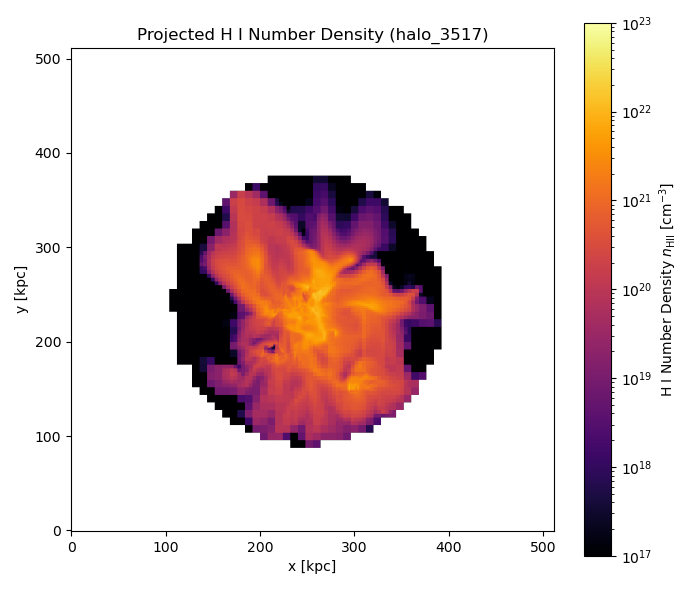

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.io import FortranFile

# --- Step 1: Load the Megatron data ---
ff = FortranFile("../DATA/halo_3517_gas.bin", "r")
gas_df = read_megatron_cutout(ff)
ff.close()
print(f"Loaded {len(gas_df)} gas cells.")

# --- Step 2: Compute temperature in linear units ---

nH   = 10**gas_df["nH"].values          # total hydrogen number density [cm^-3]
xHII = gas_df["H_II"].values            # ionized hydrogen fraction
xHI  = gas_df["H_I"].values             # neutral hydrogen fraction
nHII = nH * xHII                        # ionized hydrogen density [cm^-3]
nHI  = nH * xHI                         # neutral hydrogen density [cm^-3]
features = nHI.astype(float)

# --- Step 3: Prepare inputs for projection ---
positions = gas_df[["x","y","z"]].values.astype(float)
levels = gas_df["level"].values.astype(int)
dx = gas_df["dx"].values.astype(float)

# Clean invalids (NaN or negative)
mask = np.isfinite(features) & (features > 0)
positions = positions[mask]
levels = levels[mask]
dx = dx[mask]
features = features[mask]

# --- Step 4: Project temperature map ---
image, _ = make_image(
    positions,
    levels,
    features,
    dx,
    view_dir="z",      # project along z-axis
    npix=512,
    lmin=12,
    lmax=18,
    redshift=6.0,
    boxsize=20.0
)

# --- Step 5: Plot the temperature map ---
plt.figure(figsize=(7,6))
plt.imshow(
    image,
    norm=LogNorm(vmin= 1e17, vmax= 1e23),  # show 10^3–10^7 K
    cmap="inferno",
    origin="lower"
)
plt.colorbar(label=r"H I Number Density $n_{\rm HII}$ [cm$^{-3}$]")
plt.xlabel("x [kpc]")
plt.ylabel("y [kpc]")
plt.title("Projected H I Number Density (halo_3517)")
plt.tight_layout()
plt.show()
# plt.savefig("pics/projected_hi_number_density.png", dpi=300)